### Your name:

<pre> Lilian Li</pre>

### Collaborators:

<pre> Enter the name of the people you worked with if any</pre>


In [1]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### Classification

Q1. Build a classification model for the default of credit card clients dataset. More info here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

- Explore the data
- Make sure you build a full data pipeline
- Do you require any data pre-processing? Are all the features useful? (Use only raw features)
- set the random seed to 123 (For splitting or any other random algorithm)
- Split data into training (80%) and testing (20%)
- Follow similar procedure as the one for week 2 (End-to-end Machine Learning Project). Remember apendix B
- Study the ROC Curve, decide threshold
- Use 2 classifiers.
    - Random Forest
        - tune only: n_estimators: {3, 4, 6, 7, 10, 20, 50, 100} 
    - KNN Classfier 
        - tune only: n_neighbors: {3, 4, 5, 7, 10, 20, 50} 
    - Which one performs better in the cross validation?
    
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- Cross-validation with 4-folds.

- Other paramenters -> Use default

Notes:
  - Make your code modular, the second part of the assignmet you will have to repeat. 
  - Include documentation for your code 

In [2]:
### Your code here
import os
CARDS_PATH = os.path.join("datasets", "credit cards")

## Reading in data
df = pd.read_excel(CARDS_PATH+"/default of credit card clients.xls", 
                   sheet = 0, skiprows= 1, header = 0)

print(df.head())
print(list(df))
#print(df.dtypes)

df.info()
df.describe()
df = df.apply(lambda x: x.astype(np.int32))
df.dtypes
#df["SEX"].where(df["SEX"] == 1, "MALE", inplace=True)
#df["SEX"].where(df["SEX"] == 2, "FEMALE", inplace=True)

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

              ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0             ...                      0          0          0         0   
1             ...                   3272       3455       3261         0   
2             ...                  14331      14948      15549      1518   
3             ...                  28314      28959      29547      2000   
4             ...                  20940      19146      19131      2000   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0       689  

ID                            int32
LIMIT_BAL                     int32
SEX                           int32
EDUCATION                     int32
MARRIAGE                      int32
AGE                           int32
PAY_0                         int32
PAY_2                         int32
PAY_3                         int32
PAY_4                         int32
PAY_5                         int32
PAY_6                         int32
BILL_AMT1                     int32
BILL_AMT2                     int32
BILL_AMT3                     int32
BILL_AMT4                     int32
BILL_AMT5                     int32
BILL_AMT6                     int32
PAY_AMT1                      int32
PAY_AMT2                      int32
PAY_AMT3                      int32
PAY_AMT4                      int32
PAY_AMT5                      int32
PAY_AMT6                      int32
default payment next month    int32
dtype: object

datasets\credit cards\images
Saving figure attribute_histogram_plots


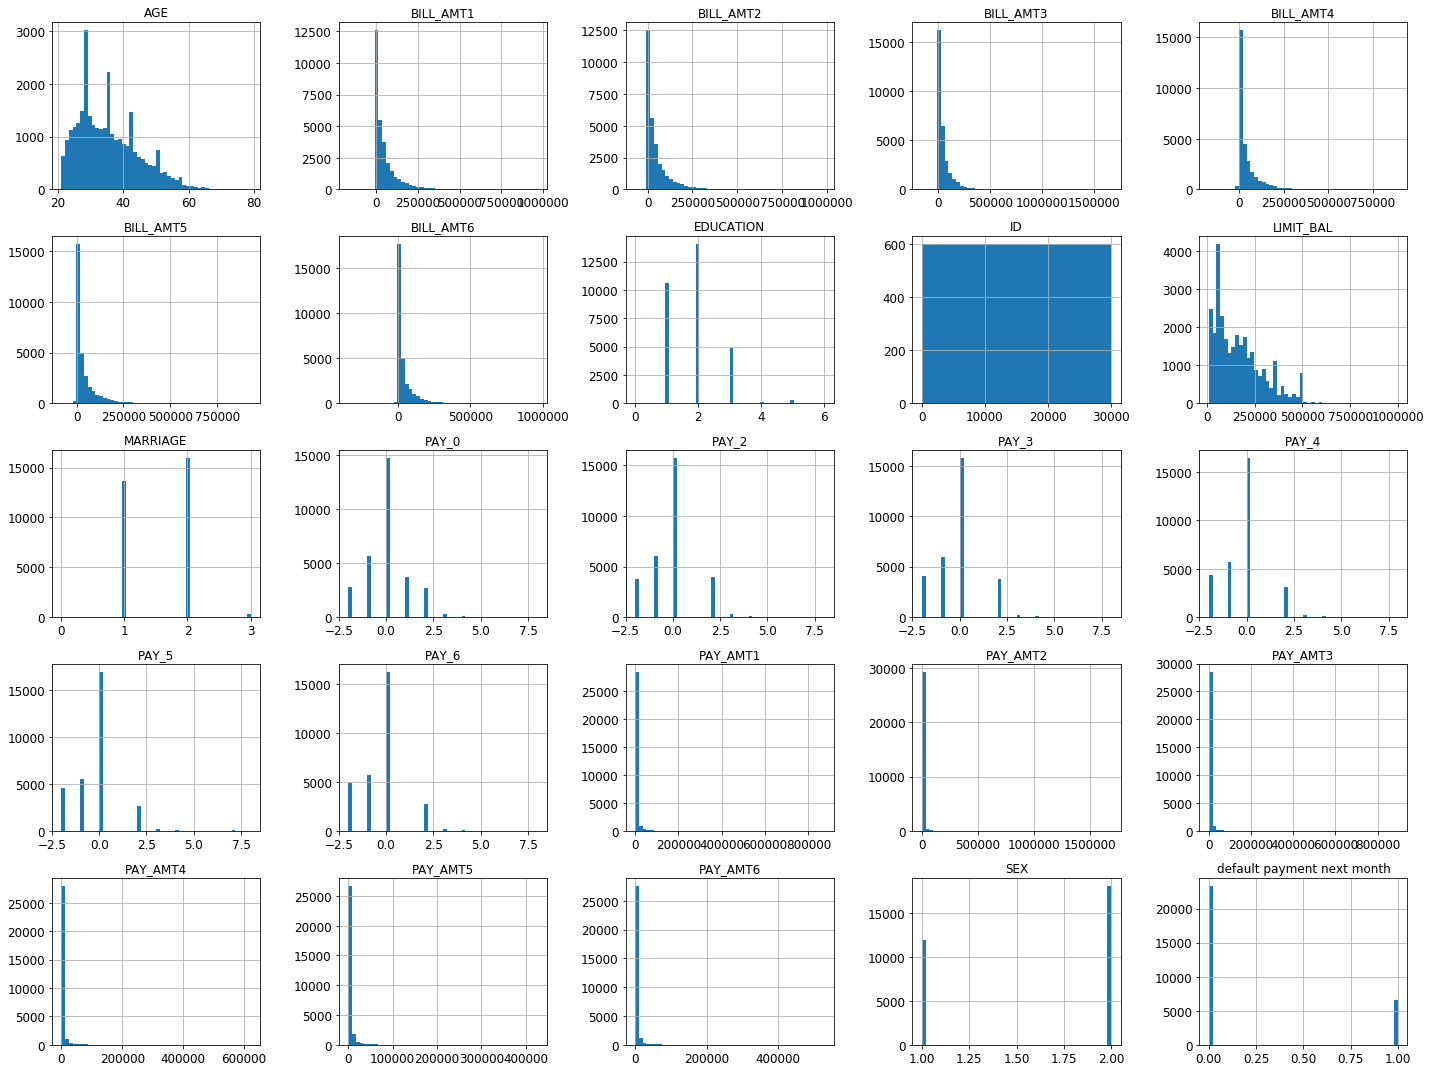

default payment next month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
ID                           -0.013952
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
LIMIT_BAL                    -0.153520
Name: default payment nex

In [3]:
# Where to save the figures

import matplotlib
import matplotlib.pyplot as plt
from six.moves import urllib

IMAGES_PATH = os.path.join(CARDS_PATH, "images")
print(IMAGES_PATH)
if not os.path.exists(IMAGES_PATH):
    os.makedirs(IMAGES_PATH)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

%matplotlib inline
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

corr_matrix = df.corr()
corr_matrix["default payment next month"].sort_values(ascending=False)
#values do not seem to be highly correlated

#attributes = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE','default payment next month']
#scatter_matrix(housing[attributes], figsize=(12, 8))
#save_fig("scatter_matrix_plot")

In [4]:
#New variables testing 
df2 = df.copy()

df2["BILL_AVG"] = df2.loc[:, df2.columns.str.contains('BILL*')].mean(axis = 1)
df2["PAY_AMT_AVG"] = df2.loc[:, df2.columns.str.contains('PAY_AMT*')].mean(axis = 1)
df2["PERCENT_PAID_AVG"] = df2["PAY_AMT_AVG"]/df2["BILL_AVG"]
df2["PERCENT_LIMIT_AVG"] = df2["BILL_AVG"]/df2["LIMIT_BAL"]

df2["AVG_PAYMENT_LAG"] = df2.loc[:,~df2.columns.str.contains('AMT')&df2.columns.str.contains('PAY')].mean(axis = 1)
df2["MAX_PAYMENT_LAG"] = df2.loc[:,~df2.columns.str.contains('AMT')&df2.columns.str.contains('PAY')].max(axis = 1)
df2["MEDIAN_PAYMENT_LAG"] = df2.loc[:,~df2.columns.str.contains('AMT')&df2.columns.str.contains('PAY')].median(axis = 1)
df2["SUM_PAYMENT_LAG"] = df2.loc[:,~df2.columns.str.contains('AMT')&df2.columns.str.contains('PAY')].sum(axis = 1)

#print(df2.loc[:,~df2.columns.str.contains('AMT')&df2.columns.str.contains('PAY')])

#print(df2.head())

corr_matrix = df2.corr()
corr_matrix["default payment next month"].sort_values(ascending=False)

default payment next month    1.000000
MAX_PAYMENT_LAG               0.331036
PAY_0                         0.324794
SUM_PAYMENT_LAG               0.295620
AVG_PAYMENT_LAG               0.281955
MEDIAN_PAYMENT_LAG            0.268504
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
PERCENT_LIMIT_AVG             0.115483
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
PERCENT_PAID_AVG             -0.011391
BILL_AVG                     -0.012691
ID                           -0.013952
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                 

In [5]:
print(114.8333/1284)
print(833.333/2846.1666)

0.08943403426791277
0.2927913636538353


In [6]:

fulldata = df.copy()
print(list(fulldata))

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


#splitting test and train set as 0.2 and 0.8, random seed = 123
train_set, test_set = train_test_split(fulldata, test_size = 0.2, random_state=123)
print(len(train_set), "train +", len(test_set), "test")

imputer = Imputer(strategy="median")
imputer.fit(fulldata)

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names=attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]
    
from sklearn.base import TransformerMixin #gives fit_transform method
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)
        
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,addvalues = True): # no *args or **kargs
        self.addvalues = addvalues
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        X["BILL_AVG"] = X.loc[:, X.columns.str.contains('BILL*')].mean(axis = 1)
        X["PAY_AMT_AVG"] = X.loc[:, X.columns.str.contains('PAY_AMT*')].mean(axis = 1)
        #X["BILL_AVG"][X["BILL_AVG"].values < X["PAY_AMT_AVG"].values] = X["PAY_AMT_AVG"].values
        #X["PERCENT_PAID_AVG"] = X["PAY_AMT_AVG"]/X["BILL_AVG"]
        X["PERCENT_LIMIT_AVG"] = X["BILL_AVG"]/X["LIMIT_BAL"]
        X["AVG_PAYMENT_LAG"] = X.loc[:,~X.columns.str.contains('AMT')&X.columns.str.contains('PAY')].mean(axis = 1)
        X["MAX_PAYMENT_LAG"] = X.loc[:,~X.columns.str.contains('AMT')&X.columns.str.contains('PAY')].max(axis = 1)
        X["MEDIAN_PAYMENT_LAG"] = X.loc[:,~X.columns.str.contains('AMT')&X.columns.str.contains('PAY')].median(axis = 1)
        X["SUM_PAYMENT_LAG"] = X.loc[:,~X.columns.str.contains('AMT')&X.columns.str.contains('PAY')].sum(axis = 1)
        return X

    
#attr_adder = CombinedAttributesAdder()
#fulldata_extra_attribs = attr_adder.transform(fulldata)
#print(fulldata_extra_attribs.head())

#cat and num field names in dataframe
num_attribs = list(fulldata.drop(["ID","default payment next month"], axis=1))
print(num_attribs)
cat_attribs = [""]

        
#defining cat and num pipelines 
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        #('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder())
    #('std_scaler', StandardScaler()),#using decision tree
    ])


#cat_pipeline = Pipeline([
#        ('selector', DataFrameSelector(cat_attribs)),
#        ('label_binarizer',MyLabelBinarizer()),
#    ])


full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline)
        #,("cat_pipeline", cat_pipeline), no cat pipeline
    ])


#train set
train_set_nolabel = train_set.drop(["ID","default payment next month"], axis=1) # drop labels for training set
print(train_set_nolabel.head())
train_labels = train_set["default payment next month"].copy()

train_set_nolabel_prepared = full_pipeline.fit_transform(train_set_nolabel)

#test set
test_set_nolabel = test_set.drop(["ID","default payment next month"], axis=1) # drop labels for training set
test_labels = test_set["default payment next month"].copy()

test_set_nolabel_prepared = full_pipeline.fit_transform(test_set_nolabel)

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=123)
tree_reg.fit(train_set_nolabel_prepared, train_labels)

default_predictions = tree_reg.predict(test_set_nolabel_prepared)
default_labels = test_labels

from sklearn.metrics import mean_squared_error
tr_mse = mean_squared_error(default_labels, default_predictions)
tr_mse = np.sqrt(tr_mse)
print(tr_mse)

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']
24000 train + 6000 test
['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
19682     200000    2          2         1   46      0      0      0      0   
11062     120000    2          1         1   32     -1     -1     -1     -1   
197        20000    2          1         2   22      0      0      0      0   
23620     100000    2          5         2   34      0      0      0      0   
26031     290000    2          

n_estimators: 3


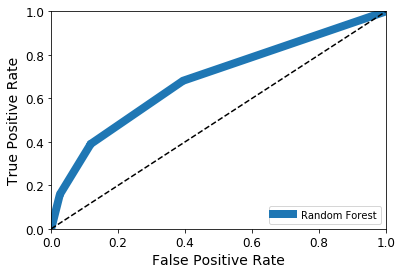

ROC AUC Score: 0.684404818327466
n_estimators: 4


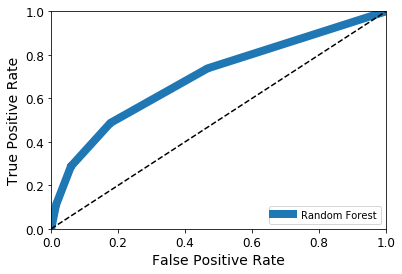

ROC AUC Score: 0.6960037413333406
n_estimators: 6


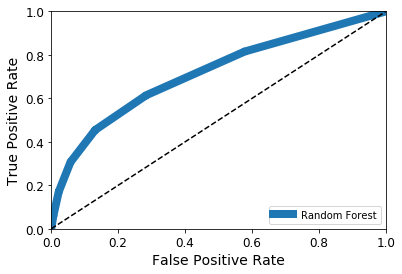

ROC AUC Score: 0.713243115859852
n_estimators: 7


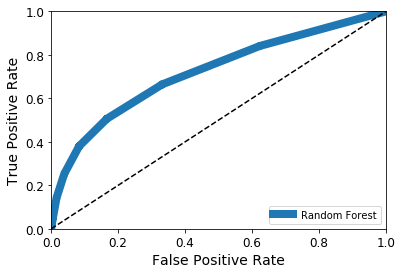

ROC AUC Score: 0.7195121227140939
n_estimators: 10


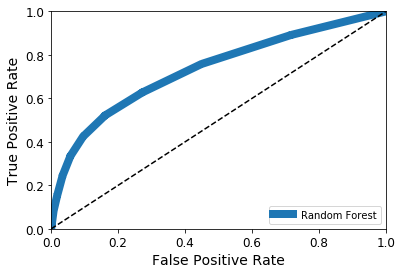

ROC AUC Score: 0.7320283205845388
n_estimators: 20


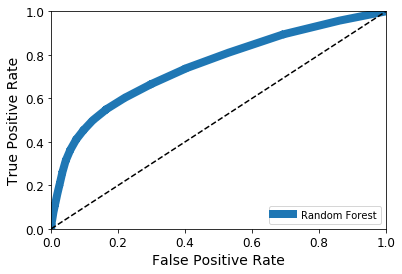

ROC AUC Score: 0.7467158749859953
n_estimators: 50


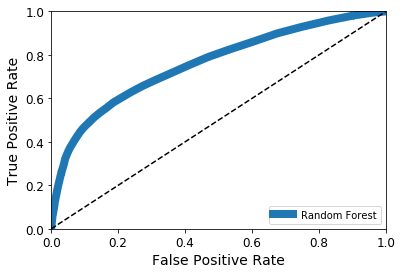

ROC AUC Score: 0.7579166074596643
n_estimators: 100


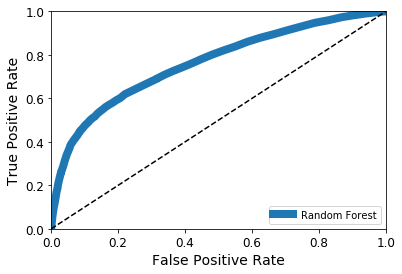

ROC AUC Score: 0.7614179816515088


In [37]:

from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=8, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

#random forest
estimators = [3, 4, 6, 7, 10, 20, 50, 100]
for i in estimators:
    forest_clf = RandomForestClassifier(n_estimators = i, random_state=123)
    y_probas_forest = cross_val_predict(forest_clf, train_set_nolabel_prepared, train_labels, cv=4,
                                           method="predict_proba") 
    y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
    fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_labels,y_scores_forest)
    print('n_estimators:',i)
    plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
    plt.legend(loc="lower right")
    plt.show()
    score_forest = roc_auc_score(train_labels, y_scores_forest)
    print('ROC AUC Score:',score_forest)


n_neighbors: 3


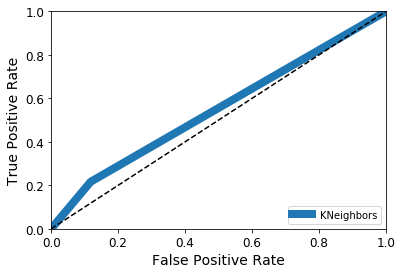

ROC AUC Score: 0.5491964176495163
n_neighbors: 4


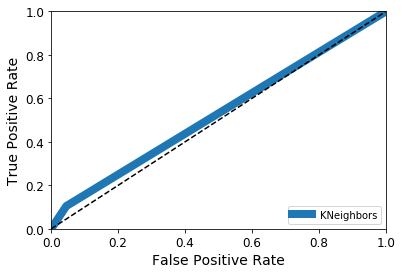

ROC AUC Score: 0.5297066311789004
n_neighbors: 5


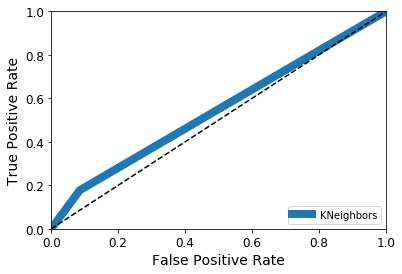

ROC AUC Score: 0.5459895145738438
n_neighbors: 7


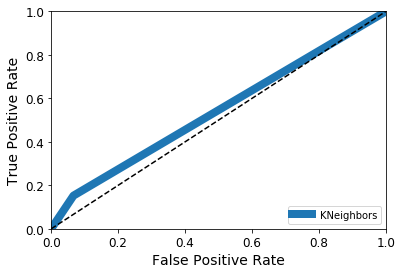

ROC AUC Score: 0.5429723284152943
n_neighbors: 10


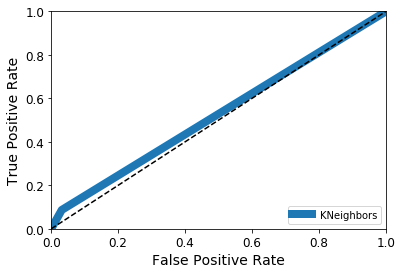

ROC AUC Score: 0.5275744557523568
n_neighbors: 20


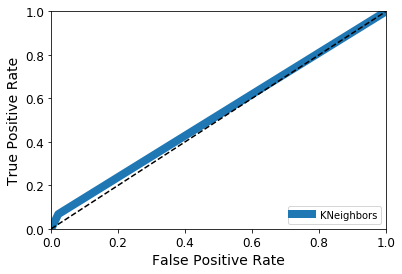

ROC AUC Score: 0.5231520543517065
n_neighbors: 50


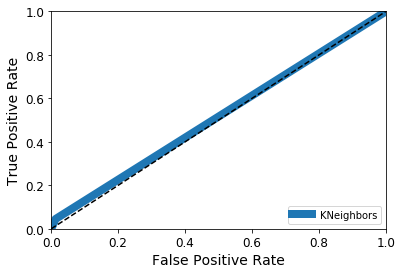

ROC AUC Score: 0.5160105847653257
n_neighbors: 100


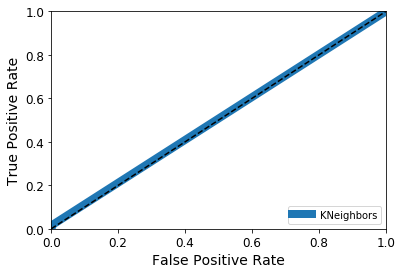

ROC AUC Score: 0.507248303397898


In [41]:
#K nearest neighbours
neighbors = [3, 4, 5, 7, 10, 20, 50,100]
for j in neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=j)
    y_train_knn = cross_val_predict(knn_clf, train_set_nolabel_prepared, train_labels, cv=4)
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(train_labels,y_train_knn)
    print('n_neighbors:',j)
    plot_roc_curve(fpr_knn, tpr_knn, "KNeighbors")
    plt.legend(loc="lower right")
    plt.show()
    score_knn = roc_auc_score(train_labels, y_train_knn)
    print('ROC AUC Score:',score_knn)


In [71]:
print(float('nan')+1)
print(float('inf')+1)
print(float('nan')+1+float('inf'))


nan
inf
nan


n_estimators: 3


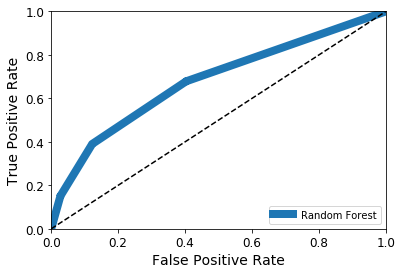

ROC AUC Score: 0.6785442744873063
n_estimators: 4


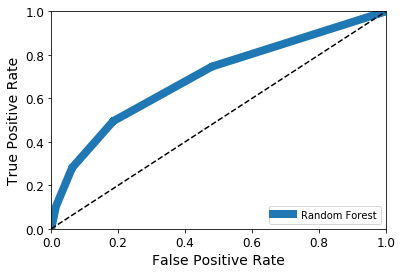

ROC AUC Score: 0.6944484473914707
n_estimators: 6


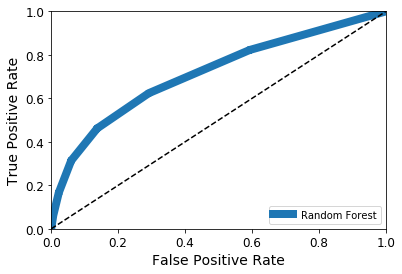

ROC AUC Score: 0.7136175365220134
n_estimators: 7


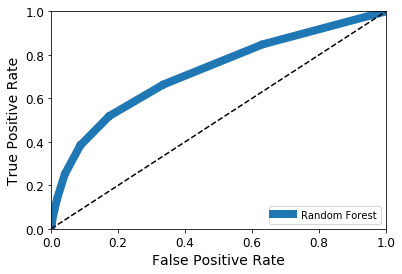

ROC AUC Score: 0.7197086913012805
n_estimators: 10


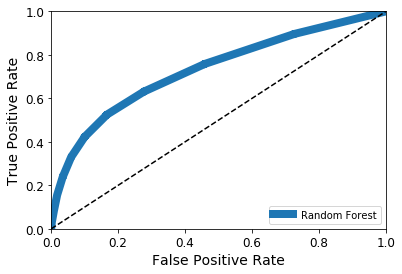

ROC AUC Score: 0.7296354150006326
n_estimators: 20


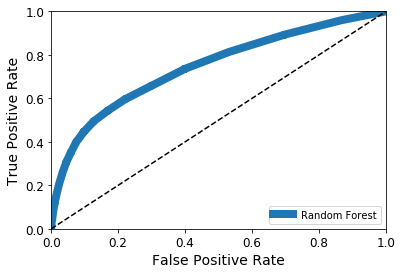

ROC AUC Score: 0.7439020035971067
n_estimators: 50


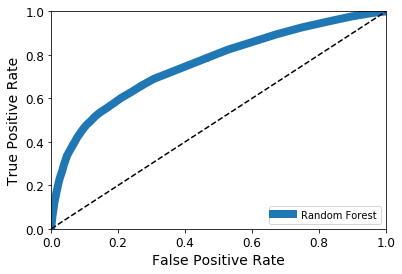

ROC AUC Score: 0.7571450109554388
n_estimators: 100


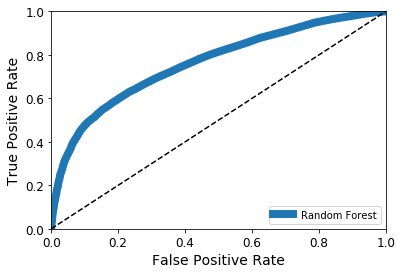

ROC AUC Score: 0.7618169407361484
n_neighbors: 3


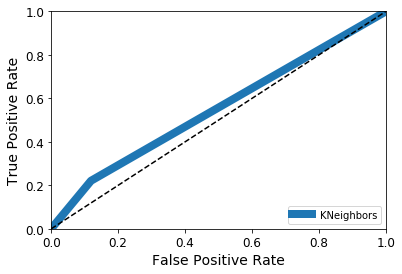

ROC AUC Score: 0.5510050777103961
n_neighbors: 4


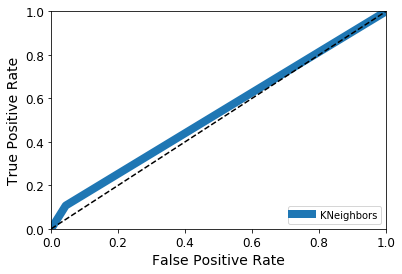

ROC AUC Score: 0.5317291999773031
n_neighbors: 5


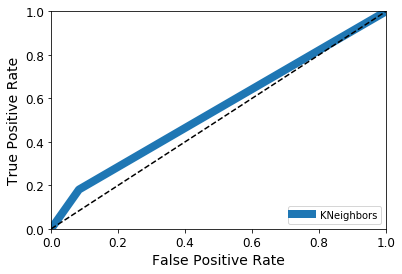

ROC AUC Score: 0.5487755121231562
n_neighbors: 7


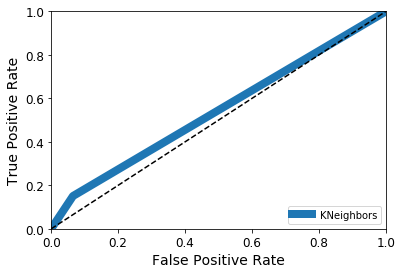

ROC AUC Score: 0.5428247462551302
n_neighbors: 10


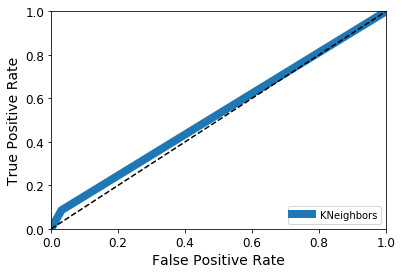

ROC AUC Score: 0.5273599442286112
n_neighbors: 20


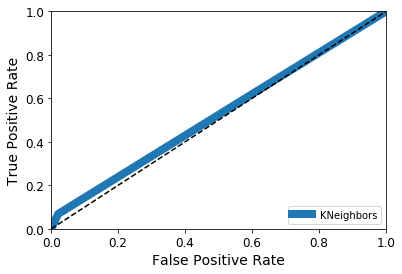

ROC AUC Score: 0.5237949861367205
n_neighbors: 50


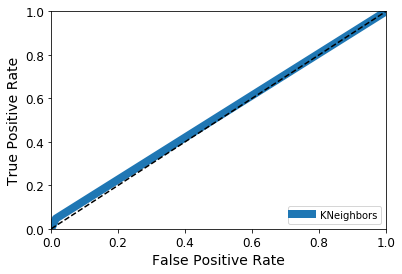

ROC AUC Score: 0.5164795725393744
n_neighbors: 100


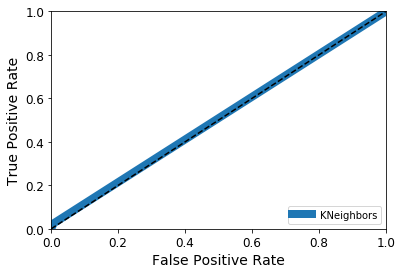

ROC AUC Score: 0.5089229841743702


In [42]:
# Cross-validation with 5-folds
#Did you get different results compared to the 4-fold case?


#random forest
estimators = [3, 4, 6, 7, 10, 20, 50, 100]
for i in estimators:
    forest_clf = RandomForestClassifier(n_estimators = i, random_state=123)
    y_probas_forest = cross_val_predict(forest_clf, train_set_nolabel_prepared, train_labels, cv=5,
                                           method="predict_proba") 
    y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
    fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_labels,y_scores_forest)
    print('n_estimators:',i)
    plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
    plt.legend(loc="lower right")
    plt.show()
    score_forest = roc_auc_score(train_labels, y_scores_forest)
    print('ROC AUC Score:',score_forest)
    
#K nearest neighbours
neighbors = [3, 4, 5, 7, 10, 20, 50, 100]
for j in neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=j)
    y_train_knn = cross_val_predict(knn_clf, train_set_nolabel_prepared, train_labels, cv=5)
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(train_labels,y_train_knn)
    print('n_neighbors:',j)
    plot_roc_curve(fpr_knn, tpr_knn, "KNeighbors")
    plt.legend(loc="lower right")
    plt.show()
    score_knn = roc_auc_score(train_labels, y_train_knn)
    print('ROC AUC Score:',score_knn)


#### Conclusions?

Explain your results and choices

In [ ]:
Adding additional variables may help performance

random forest classifier performs better than KNN, best performance at estimators = 100

cross validation with 5 folds does not necessarily perform better than 4

Q2. (Optional) Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion. 

### Conclusions
